# Forbes Global 2000 - 2021 edition
## The World’s Largest Public Companies  
![Forbes Global 2000 2021](https://media-s3-us-east-1.ceros.com/forbes/images/2021/05/12/48190052cea34b1b14fa29a6e24b655e/global-2000-2021-header.jpg?imageOpt=1&fit=bounds&width=1400)

***

## Contextualização

Forbes Global 2000 é uma classificação anual das 2.000 maiores empresas de capital aberto do mundo pela revista Forbes. O ranking é baseado em quatro critérios que recebem pesos iguais: vendas, lucro, ativos e valor de mercado. A lista é publicada desde 2003.

Para este projeto:
1. Os dados serão extraídos diretamento do website da forbes;
2. Será realizado um processo de limpeza para possibilitar a análise;
3. Serão respondidos alguns questionamentos propostos.

**Fonte do Dados:** [Forbes Global 2000 List](https://www.forbes.com/lists/global2000/#7d59af785ac0)  


## Questionamentos

**1.** [Quais são as top 10 empresas do Ranking?](#5.1.-Quais-são-as-top-10-empresas-do-Ranking?)  
**2.** [Quais são as empresas com os maiores valores de vendas?](#5.2.-Quais-são-as-empresas-com-os-maiores-valores-de-vendas?)  
**3.** [Quais são as empresas com os maiores lucros?](#5.3.-Quais-são-as-empresas-com-os-maiores-lucros?)    
**4.** [Quais são as empresas com os maiores valor de mercado?](#5.4.-Quais-são-as-empresas-com-os-maiores-valores-de-mercado?)  
**5.** [Quais são as empresas com os maiores valores em ativos?](#5.5.-Quais-são-as-empresas-com-os-maiores-valores-em-ativos?)   
**6.** [Qual ROA das top 10 empresas do Ranking?](#5.6.-Qual-ROA-das-top-10-empresas-do-Ranking?)  
**7.** [Qual margem de lucro das top 10 empresas do Ranking?](#5.7.-Qual-margem-de-lucro-das-top-10-empresas-do-Ranking?)         
**8.** [Quantos países estão presentes na lista?](#5.8.-Quantos-países-estão-presentes-na-lista?)   
**9.** [Quais são os 10 países com maior número de empresas na lista? Quantas empresas cada um possui?](#5.9.-Quais-são-os-10-países-com-maior-número-de-empresas-na-lista?-Quantas-empresas-cada-um-possui?)    
**10.** [Qual a porcentagem do total de empresas corresponde o país com o maior número de empresas na lista?](#5.10.-Qual-a-porcentagem-do-total-de-empresas-corresponde-o-país-com-o-maior-número-de-empresas-na-lista?)    
**11.** [As primeiras 20% empresas da lista representa quantos % do das vendas totais? E do lucro? E dos ativos? E do valor de mercado?](#5.11.-As-primeiras-20%-empresas-da-lista-representa-quantos-%-das-vendas-totais?-E-do-lucro?-E-dos-ativos?-E-do-valor-de-mercado?)  
**12.** [Há empresas brasileiras na lista? Quantas? Quais são elas? Quais suas posições?](#5.12.-Há-empresas-brasileiras-na-lista?-Quantas?-Quais-são-elas?-Quais-suas-posições?)

## Agenda

**1.** [Importando Pacotes](#1.-Importando-Pacotes)   
**2.** [Web Scraping](#2.-Web-Scraping)  
**3.** [Conhecendo os Dados](#3.-Conhecendo-os-Dados)     
**4.** [Limpando dos Dados](#4.-Limpando-dos-Dados)     
**5.** [Respondendo as Perguntas](#5.-Respondendo-as-Perguntas)     
***

## 1. Importando Pacotes

In [3]:
# Instalando selenium
#!pip install selenium -q

# Instalando wordcloud
#!pip install wordcloud -q

In [4]:
# Importando Pacotes

import time

from bs4 import BeautifulSoup

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

import pandas as pd

import re

from wordcloud import WordCloud

import matplotlib.pyplot as plt

## 2. Web Scraping

Forbes pertimite a extração dos dados que precisamos: [Forbes robots.txt](https://www.forbes.com/robots.txt)

In [5]:
# Instanciando o Navegador
driver_service = Service("chromedriver.exe")
driver = webdriver.Chrome(service = driver_service)

# Determinando o Link
url = "https://www.forbes.com/lists/global2000/#7d59af785ac0"

# Chamando o Navegador 
driver.get(url)

# Inicialiazando variável para armazenar os dados brutos extraídos
df_raw = None

# Iterando pelas páginas
for pages in range(0,20):
    
    # Aguardando a página carregar
    time.sleep(5)

    # Extraindo o cunteúdo da tabela
    xpath_tabela = "//div[@class='ng-scope ng-isolate-scope']//table"
    elemento_tabela = driver.find_element(By.XPATH, xpath_tabela)
    cont_tabela_html = elemento_tabela.get_attribute("outerHTML")

    # Formatando o html
    soup = BeautifulSoup(cont_tabela_html, "html.parser")
    tabela = soup.find(name = "table")

    # Transformando o código html em um dataframe pandas
    df_raw = pd.concat([df_raw, pd.read_html(str(tabela))[0]])
    
    # Passando a página do ranking
    xpath_next_page = "//div[@class='ng-table-pager ng-scope']//ul//li//a[@ng-switch-when='next']"
    driver.find_element(By.XPATH, xpath_next_page).click()

# Fechando o navegador
driver.quit()

## 3. Conhecendo os Dados

In [6]:
# Olhando para as dimensões do dataset

df_raw.shape

(2140, 8)

In [9]:
# Olhando para os primeiros registros

df_raw.head()

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B,NaN
2,2.0,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B,NaN
3,3.0,Berkshire Hathaway,United States,$245.5 B,$42.5 B,$873.7 B,$624.4 B,NaN
4,4.0,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B,NaN


In [10]:
# Olhando para o tipo dos dados

df_raw.dtypes

Rank            float64
Name             object
Country          object
Sales            object
Profit           object
Assets           object
Market Value     object
Unnamed: 7      float64
dtype: object

In [11]:
# Verificando se há valores nulos

df_raw.isna().sum()

Rank             140
Name             140
Country          140
Sales            140
Profit           140
Assets           141
Market Value     140
Unnamed: 7      2140
dtype: int64

## 4. Limpando dos Dados

In [12]:
#Retirando coluna "Unnamed: 7"

df = df_raw.drop(columns = "Unnamed: 7")

df

,Rank,Name,Country,Sales,Profit,Assets,Market Value
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B
2,2.0,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B
3,3.0,Berkshire Hathaway,United States,$245.5 B,$42.5 B,$873.7 B,$624.4 B
4,4.0,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B
...,...,...,...,...,...,...,...
102,1996.0,JTEKT,Japan,$13.1 B,$-34.9 M,$12 B,$3.5 B
103,1997.0,Insurance Australia Group,Australia,$5.4 B,$-212 M,$25 B,$9.3 B
104,1997.0,Sumec Corporation,China,$13 B,$79.2 M,$7.1 B,$1.3 B
105,1999.0,Gold Fields,South Africa,$3.9 B,$718.1 M,$7.5 B,$8.9 B


In [13]:
# Ordenando valores por Rank e resetando índices
df = df.sort_values(by = "Rank").reset_index()
df = df.drop(columns = "index")

# Verificando os registros totalmente nulos
df[(df.isna() == True).values.any(axis=1)]

,Rank,Name,Country,Sales,Profit,Assets,Market Value
1932,1933.0,Bank of Greece,Greece,$1.3 B,$942.8 M,NaN,$366 M
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2138,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Verificando os registros totalmente nulos

df[(df.isna() == True).values.any(axis=1)]

,Rank,Name,Country,Sales,Profit,Assets,Market Value
1932,1933.0,Bank of Greece,Greece,$1.3 B,$942.8 M,NaN,$366 M
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2138,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Substituido valor nulo dos ativos do Banco da Grécia por "$0 M"

df.loc[1932 ,"Assets"] = "$0 M"

In [16]:
# Retirando os registro nulos

df = df.dropna()

df

,Rank,Name,Country,Sales,Profit,Assets,Market Value
0,1.0,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B
1,2.0,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B
2,3.0,Berkshire Hathaway,United States,$245.5 B,$42.5 B,$873.7 B,$624.4 B
3,4.0,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B
4,5.0,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$229.7 B,$49.3 B,$510.3 B,"$1,897.2 B"
...,...,...,...,...,...,...,...
1995,1996.0,JTEKT,Japan,$13.1 B,$-34.9 M,$12 B,$3.5 B
1996,1997.0,Insurance Australia Group,Australia,$5.4 B,$-212 M,$25 B,$9.3 B
1997,1997.0,Sumec Corporation,China,$13 B,$79.2 M,$7.1 B,$1.3 B
1998,1999.0,Gold Fields,South Africa,$3.9 B,$718.1 M,$7.5 B,$8.9 B


In [17]:
# Aterando tipo da variável Rank para inteiro

df["Rank"] = df["Rank"].astype(int) 

In [18]:
# Funcão para limpar valores de vendas, lucros, ativos e valor de mercado e transformar em float

def clean_values(data, column):
    
    df_private = data.copy()
    df_reference = data.copy()
    column_private = column
    
    for i in range(0, df_private[column_private].count()):
            
            df_private.loc[i, column_private] = re.findall("[\d.-^,]+", df_private.loc[i, column_private])[0].replace(",", "")

    df_private[column_private] = df_private[column_private].astype("float64")
    
    for i in range(0, df_private[column_private].count()):
        
        if (re.findall("[\d.-^,]+", df_reference.loc[i, column_private])[1] == "M"):
            
            df_private.loc[i, column_private] = df_private.loc[i, column_private] * 1000000
            
        elif (re.findall("[\d.-^,]+", df_reference.loc[i, column_private])[1] == "B"):
            
            df_private.loc[i, column_private] = df_private.loc[i, column_private] * 1000000000
            
    return df_private

In [19]:
# Limpando colunas vendas, lucros, ativos e valor de mercado

colunas_limpar = df.columns.tolist()[3:7]

for col in colunas_limpar:
    
    df = clean_values(df, col)
    
df.head()

,Rank,Name,Country,Sales,Profit,Assets,Market Value
0,1,ICBC,China,1.905000e+11,4.580000e+10,4.914700e+12,2.495000e+11
1,2,JPMorgan Chase,United States,1.362000e+11,4.040000e+10,3.689300e+12,4.648000e+11
2,3,Berkshire Hathaway,United States,2.455000e+11,4.250000e+10,8.737000e+11,6.244000e+11
3,4,China Construction Bank,China,1.735000e+11,3.930000e+10,4.301700e+12,2.104000e+11
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,2.297000e+11,4.930000e+10,5.103000e+11,1.897200e+12


In [35]:
#Salavando os dados limpos em disco
df.to_csv("Forbes_Global_2000-2021.csv", encoding='utf-8', index = False)

## 5. Respondendo as Perguntas

### 5.1. Quais são as top 10 empresas do Ranking?

In [21]:
df.head(10)[["Rank", "Name"]]

,Rank,Name
0,1,ICBC
1,2,JPMorgan Chase
2,3,Berkshire Hathaway
3,4,China Construction Bank
4,5,Saudi Arabian Oil Company (Saudi Aramco)
5,6,Apple
6,6,Bank of America
7,6,Ping An Insurance Group
8,9,Agricultural Bank of China
9,10,Amazon


### 5.2. Quais são as empresas com os maiores valores de vendas?

In [22]:
df.sort_values(by="Sales", ascending = False)[["Rank", "Name"]].head(10)

,Rank,Name
17,18,Walmart
9,10,Amazon
5,6,Apple
62,63,PetroChina
47,48,Sinopec
36,37,CVS Health
20,21,UnitedHealth Group
16,17,Volkswagen Group
11,12,Toyota Motor
2,3,Berkshire Hathaway


### 5.3. Quais são as empresas com os maiores lucros?

In [23]:
df.sort_values(by="Profit", ascending = False)[["Rank", "Name", "Profit"]].head(10)

,Rank,Name,Profit
5,6,Apple,6.390000e+10
14,15,Microsoft,5.130000e+10
4,5,Saudi Arabian Oil Company (Saudi Aramco),4.930000e+10
0,1,ICBC,4.580000e+10
2,3,Berkshire Hathaway,4.250000e+10
1,2,JPMorgan Chase,4.040000e+10
12,13,Alphabet,4.030000e+10
3,4,China Construction Bank,3.930000e+10
8,9,Agricultural Bank of China,3.130000e+10
32,33,Facebook,2.910000e+10


### 5.4. Quais são as empresas com os maiores valores de mercado?

In [24]:
df.sort_values(by="Market Value", ascending = False)[["Rank", "Name", "Market Value"]].head(10)

,Rank,Name,Market Value
5,6,Apple,2.252300e+12
14,15,Microsoft,1.966600e+12
4,5,Saudi Arabian Oil Company (Saudi Aramco),1.897200e+12
9,10,Amazon,1.711800e+12
12,13,Alphabet,1.538900e+12
32,33,Facebook,8.705000e+11
28,29,Tencent Holdings,7.738000e+11
261,262,Tesla,7.101000e+11
22,23,Alibaba Group,6.575000e+11
2,3,Berkshire Hathaway,6.244000e+11


### 5.5. Quais são as empresas com os maiores valores em ativos?

In [25]:
df.sort_values(by="Assets", ascending = False)[["Rank", "Name", "Assets"]].head(10)

,Rank,Name,Assets
0,1,ICBC,4.914700e+12
3,4,China Construction Bank,4.301700e+12
8,9,Agricultural Bank of China,4.159900e+12
297,298,Fannie Mae,3.986100e+12
13,14,Bank of China,3.731400e+12
1,2,JPMorgan Chase,3.689300e+12
51,52,Mitsubishi UFJ Financial,3.406500e+12
29,30,BNP Paribas,3.044800e+12
39,40,HSBC Holdings,2.984200e+12
86,87,Japan Post Holdings,2.879000e+12


### 5.6. Qual ROA das top 10 empresas do Ranking?

In [26]:
df_ROA = df.copy()
df_ROA["ROA"] = df_ROA["Profit"] / df_ROA["Assets"] * 100

df_ROA.sort_values(by="Rank", ascending = True)[["Rank", "Name", "ROA"]].head(10)

,Rank,Name,ROA
0,1,ICBC,0.931898
1,2,JPMorgan Chase,1.095059
2,3,Berkshire Hathaway,4.864370
3,4,China Construction Bank,0.913592
4,5,Saudi Arabian Oil Company (Saudi Aramco),9.660984
5,6,Apple,18.045750
6,6,Bank of America,0.632018
7,6,Ping An Insurance Group,1.430733
8,9,Agricultural Bank of China,0.752422
9,10,Amazon,6.631382


### 5.7. Qual margem de lucro das top 10 empresas do Ranking? 

In [27]:
df_PM = df.copy()
df_PM["PM"] = df_PM["Profit"] / df_PM["Sales"] * 100

df_PM.sort_values(by="Rank", ascending = True)[["Rank", "Name", "PM"]].head(10)

,Rank,Name,PM
0,1,ICBC,24.041995
1,2,JPMorgan Chase,29.662261
2,3,Berkshire Hathaway,17.311609
3,4,China Construction Bank,22.651297
4,5,Saudi Arabian Oil Company (Saudi Aramco),21.462778
5,6,Apple,21.734694
6,6,Bank of America,18.117409
7,6,Ping An Insurance Group,12.300414
8,9,Agricultural Bank of China,20.337882
9,10,Amazon,5.516706


### 5.8. Quantos países estão presentes na lista?

In [28]:
df["Country"].value_counts().count()

61

### 5.9. Quais são os 10 países com maior número de empresas na lista? Quantas empresas cada um possui?

In [29]:
df["Country"].value_counts().head(10)

United States     590
China             291
Japan             215
United Kingdom     66
South Korea        62
Hong Kong          59
Canada             56
Germany            54
France             53
India              50
Name: Country, dtype: int64

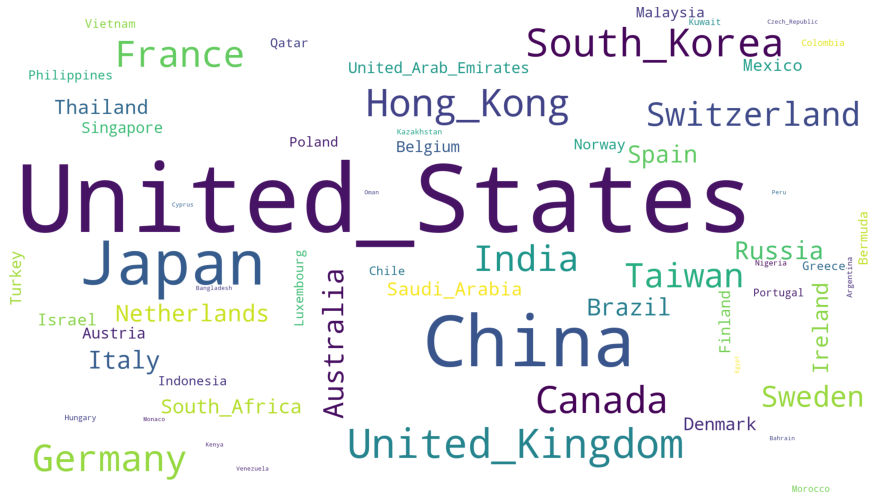

In [30]:
# Lista de palavras
países = df["Country"].apply(lambda x: x.replace(" ","_"))
países_nuvem = " ".join(país for país in países)

#Grando a nuvem
nuvem = WordCloud(background_color = "white",
                  width = 1920,
                  height = 1080).generate(países_nuvem)

#Exibindo a nuvem
fix,ax = plt.subplots(figsize=(16,9))
ax.imshow(nuvem, interpolation = "bilinear")
ax.set_axis_off()
plt.imshow(nuvem)

### 5.10. Qual a porcentagem do total de empresas corresponde o país com o maior número de empresas na lista?

In [31]:
str(df["Country"].value_counts()[0]/ 2000 *100) + "%"

'29.5%'

### 5.11. As primeiras 20% empresas da lista representa quantos % das vendas totais? E do lucro? E dos ativos? E do valor de mercado?

In [32]:
pd.concat([pd.Series(df.columns.tolist()[3:7]).to_frame(name = "Variáveis"), 
          pd.Series([str(round(df["Sales"][0:400].sum() / df["Sales"].sum() * 100, 2)) + "%", 
           str(round(df["Profit"][0:400].sum() / df["Profit"].sum() * 100, 2)) + "%",
           str(round(df["Assets"][0:400].sum() / df["Assets"].sum() * 100, 2)) + "%",
           str(round(df["Market Value"][0:400].sum() / df["Market Value"].sum() * 100, 2)) + "%"]).to_frame(name = "Participação")], axis = 1, join = "inner")

,Variáveis,Participação
0,Sales,55.98%
1,Profit,60.52%
2,Assets,67.37%
3,Market Value,60.73%


### 5.12. Há empresas brasileiras na lista? Quantas? Quais são elas? Quais suas posições?

In [33]:
df[df["Country"] == "Brazil"][["Name"]].count()

Name    21
dtype: int64

In [34]:
df[df["Country"] == "Brazil"][["Rank", "Name"]]

,Rank,Name
108,109,Itaú Unibanco Holding
112,113,Vale
154,154,Banco Bradesco
158,159,Petrobras
271,272,Banco do Brasil
524,525,JBS
679,680,Banco Btg Pactual
958,959,Eletrobrás
1219,1218,Itaúsa
1321,1322,B3
